In [116]:
#Projet

## Question 1

*Approximate the integral of f using standard Monte Carlo and quasi-Monte Carlo,
and compare the results, for different values of d (and different Monte Carlo sample
sizes!).*

**A. Monte-Carlo standard**

In [117]:
#!pip install qmcpy

In [49]:
import time
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats.qmc import Sobol

In [50]:
#Fonction target

def f(u):
    d = u.shape[1] 
    return 1 + np.sin(2 * np.pi * (1/d * np.sum(u, axis = 1) - 1/2))

def f2D(u,v):
    d = u.shape[1] 
    return 1 + np.sin(2 * np.pi * (1/d * (u+v) - 1/2))

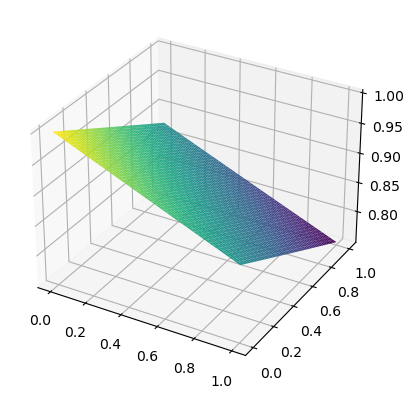

In [51]:
x1 = np.linspace(0, 1, num=50)
x2 = np.linspace(0, 1, num=50)
x3 = np.linspace(0, 1, num=50)
X1, X2 = np.meshgrid(x1, x2)
Z = f2D(X1, X2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d') # pour un graphe en 3D
ax.plot_surface(X1, X2, Z, cmap='viridis')
plt.show()


In [52]:
#Estimation de l'intégrale par la méthode de Monte Carlo standard

def MonteCarlo(f,d,N):
    x = np.random.rand(N, d)
    integral = np.sum(f(x))/N
    return(integral)

In [53]:
MonteCarlo(f, N = 10000000, d = 3)

0.9998518935838994

**B. Quasi Monte-Carlo**

In [54]:
#Estimation de l'intégrale par la méthode de Quasi Monte Carlo 

def QuasiMonteCarlo(f, d, N):
    sobol = Sobol(d) #Génération des points quasi-aléatoires avec la méthode Sobol
    u = sobol.random(n=N) #Génération des points quasi-aléatoires
    integral = np.sum(f(u))/N #Calcul de l'intégrale approximative
    return(integral)

QuasiMonteCarlo(f, N = 10000000, d = 3)

0.99999992260744

**C. Comparaison**

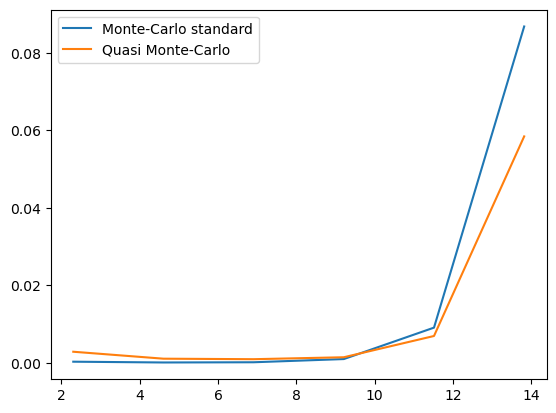

In [55]:
#Temps de calcul
NN = np.array([10, 100, 1000, 10000, 100000, 1000000])

tempsMCstandard = []
tempsQMC = []

for n in NN :
    start_time = time.time()
    MonteCarlo(f, N = n, d = 3) #Appel de la fonction
    end_time = time.time()
    tempsMCstandard.append(end_time - start_time)
    
    start_time = time.time()
    QuasiMonteCarlo(f, N = n, d = 3) #Appel de la fonction
    end_time = time.time()
    tempsQMC.append(end_time - start_time)

plt.plot(np.log(NN),tempsMCstandard)
plt.plot(np.log(NN),tempsQMC)
plt.legend(['Monte-Carlo standard', 'Quasi Monte-Carlo'])


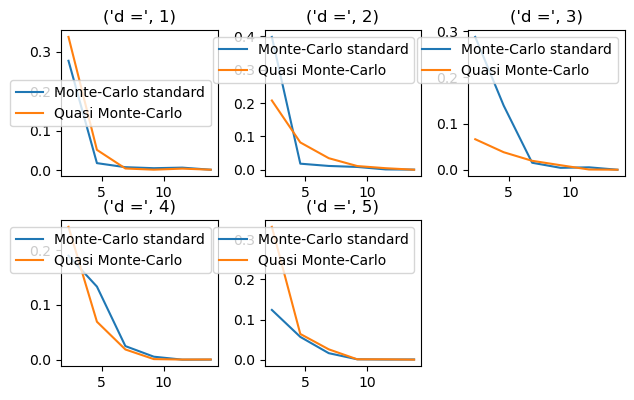

In [56]:
#Précision
NN = np.array([10, 100, 1000, 10000, 100000, 1000000])
DD = np.arange(1,6)

l = 1
for d in DD:
    precisionMCstandard = []
    precisionQMC = []
    for n in NN :
        y_predict = MonteCarlo(f, N = n, d = d) #Appel de la fonction
        precisionMCstandard.append(np.abs(1-y_predict))

        y_predict = MonteCarlo(f, N = n, d = d) #Appel de la fonction
        precisionQMC.append(np.abs(1-y_predict))
    
    plt.subplot(2,3,l)
    plt.plot(np.log(NN),precisionMCstandard)
    plt.plot(np.log(NN),precisionQMC)
    plt.legend(['Monte-Carlo standard', 'Quasi Monte-Carlo'])
    plt.title(('d =', d))
    l+=1

plt.gcf().subplots_adjust(left = 0.02, bottom = 0.2, right = 0.9, top = 0.9, wspace = 0.3, hspace = 0.3)
#plt.figure(figsize = (20, 10))

In [57]:
#comparaisons à améliorer

## Question 2

*Read the introduction of the following paper https://arxiv.org/abs/2210.01554
up to Equations (5) and (6), which introduce Haber’s estimators of order 1 and
2. Implement these two estimators, and compare to the results of Step 1. (Again
consider different values of d and N, where N is the number of evalations of f).*

In [23]:
import numpy as np
from scipy.integrate import nquad
from scipy.stats import uniform

In [13]:
d = 1
#bornes d'intégration
limits = [(0,1)]*d
#nb de cellules
n_cells = 5
#taille des cellules
cell_size = [(lim[1]-lim[0])/n_cells for lim in limits]

In [14]:
#calcul des coordonnées des centres de chaque cellule
grid = np.meshgrid(*[np.linspace(lim[0]+cell_size[i]/2, lim[1]-cell_size[i]/2, n_cells) for i, lim in enumerate(limits)])
cell_centers = np.array([g.ravel() for g in grid]).T
#évaluation de la fonction f en chaque centre c
f_values = f(cell_centers)

In [15]:
#estimation de l'intégrale par l'estimateur d'Haber
integral = np.sum(f_values * np.prod(cell_size)) # ou : np.mean(f_values) * np.prod(cell_size) * n_cells ** len(limits)
integral

1.0

In [16]:
#pas sure de l'estimateur, à relire

**A. Harber's Estimators**

In [62]:
# Haber's Estimator selon ChatGPT, j'ai pas tout tout compris mais ça sort des trucs sympas...
from scipy.stats import uniform

def HaberEstimators(func, d, k, order=1):
    N = k * d
    Uc = uniform.rvs(size=(N, d), loc=-1/(2*k), scale=1/k)
    Ck = [np.array([i/k for _ in range(d)]) for i in range(k)]

    if order == 1:
        f_values = [func(np.expand_dims(c + uc, axis=0)) for c, uc in zip(Ck, Uc)]
        return np.mean(f_values)
    elif order == 2:
        f_values = [0.5 * (func(np.expand_dims(c + uc, axis=0)) + func(np.expand_dims(c - uc, axis=0))) for c, uc in zip(Ck, Uc)]
        return np.mean(f_values)

In [64]:
HaberEstimators(f, d = 3, k = 3333333, order=1)

1.0000000001118676

In [65]:
HaberEstimators(f, d = 3, k = 3333333, order=2)

0.9999999999999996

**B. Comparaison**

In [63]:
# Comparaison des méthodes... (on préfere Haber d'ordre 2 quand f est 2 fois continuement différentiable)
ds = [1, 2, 3]
k_values = [10, 50, 100]

for d in ds:
    for k in k_values:
        N = d * k
        mc_result = MonteCarlo(f, d, N)
        qmc_result = QuasiMonteCarlo(f, d, N)
        haber1_result = HaberEstimators(f, d, k, order=1)
        haber2_result = HaberEstimators(f, d, k, order=2)

        print(f"d = {d}, N = {N}")
        print(f"Standard Monte Carlo: {mc_result}")
        print(f"Quasi-Monte Carlo: {qmc_result}")
        print(f"Haber's estimator of order 1: {haber1_result}")
        print(f"Haber's estimator of order 2: {haber2_result}")
        print("\n")

d = 1, N = 10
Standard Monte Carlo: 0.9707218872913966
Quasi-Monte Carlo: 1.0266775811210986
Haber's estimator of order 1: 0.9981537829911911
Haber's estimator of order 2: 0.9993031476722274


d = 1, N = 50
Standard Monte Carlo: 0.9590501674895183
Quasi-Monte Carlo: 0.9886987817328731
Haber's estimator of order 1: 1.0022995029969104
Haber's estimator of order 2: 0.9999692355037278


d = 1, N = 100
Standard Monte Carlo: 0.9297280523699065
Quasi-Monte Carlo: 0.9999854813238693
Haber's estimator of order 1: 1.0015868274136401
Haber's estimator of order 2: 1.0000090157894714


d = 2, N = 20
Standard Monte Carlo: 0.841349365522519
Quasi-Monte Carlo: 1.0783358961746317
Haber's estimator of order 1: 0.9523773916178963
Haber's estimator of order 2: 0.9993555775729824


d = 2, N = 100
Standard Monte Carlo: 1.0592731303832845
Quasi-Monte Carlo: 1.014329628521874
Haber's estimator of order 1: 0.9961922055637104
Haber's estimator of order 2: 1.0000204122643448


d = 2, N = 200
Standard Monte Carlo